# Sin(x) with LSTM-VAE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fints_generation.models import LSTMVAE

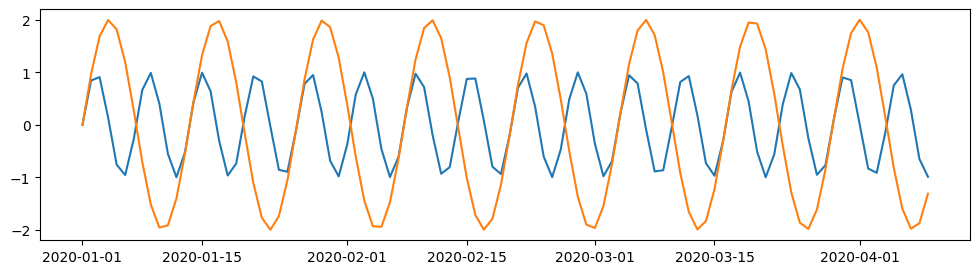

In [3]:
N = 1000
data = pd.DataFrame({
    'X1': np.sin(np.linspace(0, N/1, N)),
    'X2': np.sin(np.linspace(0, N/2, N))*2,
}, index=pd.date_range('2020-01-01', periods=N, freq='D'))

plt.figure(figsize=(12, 3))
plt.plot(data.iloc[:100]);

In [7]:
vae = LSTMVAE(
    latent_dim=1,
    hidden_dim=16,
    num_layers=1,
    window_size=20,
    batch_size=16,
    num_epochs=20,
    verbose=True,
    lr=0.001,
)
vae.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name       | Type   | Params
--------------------------------------
0 | enc        | LSTM   | 1.3 K 
1 | dec        | LSTM   | 1.2 K 
2 | mu         | Linear | 17    
3 | sigma      | Linear | 17    
4 | projection | Linear | 34    
--------------------------------------
2.6 K     Trainable params
0         Non-trainable params
2.6 K     Total params
0.010     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [8]:
fakes = vae.sample(data.index, n_samples=10)
fakes[0].head()

,X1,X2
2020-01-01,0.034606,-0.348575
2020-01-02,0.427848,0.056890
2020-01-03,0.599924,-0.187821
2020-01-04,0.632457,-0.305988
2020-01-05,0.578284,-0.328721


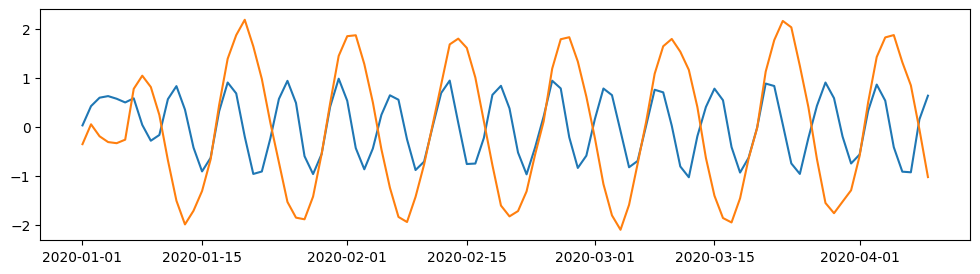

In [31]:
plt.figure(figsize=(12, 3))
plt.plot(fakes[0].iloc[:100]);